# Unit 2 Assessment

## Akshit RamPershad- U87835413
## Sanjana Thinderu- U16484810


In this assignment, we will focus on salary prediction. The data set for this assignment includes information on job postings. Use this data set to see if you can predict the salary of a job posting (i.e., the `Salary` column in the data set) based on the job description and other attributes of the job. This is important, because this model can make a salary recommendation as soon as a job posting is entered into a system.

## Description of Variables

The description of variables are provided in "Jobs - Data Dictionary.docx"

## Goal

Use the **jobs_alldata.csv** data set and build models to predict **salary**.

**Be careful: this is a REGRESSION task**

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


## Important hints:

* This assignment requires you to work with a text-based column in addition to regular numeric/categorical columns. So you will have to pay attention to your pipelines during data processing.
* You can do your data prep before or after the train/test split. Regardless, you should use train_test_split only once. If you find yourself using it twice, it means you are doing something wrong.
* Recommended approach: 
    * import the data and perform the train/test split - like we always do. 
    * identify the names of numeric, categorical, feature engineered, and text columns - like we always do
    * create individual pipelines for each type of column - like we always do. For the text pipeline, I would recommend the TFIDF Vectorizer with SVDs. Though, you can also use TFIDF Vectorizer with top N terms (without SVDs).
    * combine all pipelines using the column transformer - like we always do 

# Section 1: (6 points in total)

## Data Prep (4 points)

## Set Up

In [1]:
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)

## Load Data

In [4]:
#We will predict the "Salary" value in the data set:

jobs = pd.read_csv("jobs_alldata.csv")
jobs.head()

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel
0,67206,Civil Service Title: Regional Director Mental ...,Remote,5,2,3,No
1,88313,The New York City Comptrollerâ€™s Office Burea...,Remote,5,2,4,10-15 hrs
2,81315,With minimal supervision from the Deputy Commi...,East campus,5,3,3,5-10 hrs
3,76426,OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...,East campus,1,1,3,No
4,55675,Only candidates who are permanent in the Princ...,Southeast campus,1,1,3,5-10 hrs


## Split the data into train and test

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(jobs, test_size=0.3)

## Checking for missing values

In [4]:
train_set.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

In [5]:
test_set.isna().sum()

Salary             0
Job Description    0
Location           0
Min_years_exp      0
Technical          0
Comm               0
Travel             0
dtype: int64

# Data Prep

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

## Select the Target Variable

In [7]:
train_y = train_set[['Salary']]
test_y = test_set[['Salary']]

train_inputs = train_set.drop(['Salary'], axis=1)
test_inputs = test_set.drop(['Salary'], axis=1)

## Sklearn: Text preparation

In [8]:
# In order to use NLTK, you need to install it first. If you don't have it already installed, convert this
# cell to "Code" from the toolbar and then execute it to install it.
!pip install nltk

In [9]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanjanathinderu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanjanathinderu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanjanathinderu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanjanathinderu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Custom tokenizer 

In [10]:
def nltk_tokenizer(dataset):

    #Create a blank list
    returned_data = []

    # For each row in dataset, we will read the text, tokenize it, remove stopwords, lemmatize it, 
    # and append it to the list

    for text in dataset:
        text = re.sub(r'[!"#$%&()*+,-./:;<=>?[\]^_`{|}~]', ' ', text).lower()
        words= nltk.tokenize.word_tokenize(text)
        words = [w for w in words if w.isalpha()]  # include only letter-based terms, exclude all terms with numbers
        words = [w for w in words if len(w)>1 and w not in stopwords.words('english')] #include terms that have more than 2 chars and not included in stopwords
        lemmatizer = nltk.stem.WordNetLemmatizer()
        words = [lemmatizer.lemmatize(w) for w in words]
        returned_data.append(' '.join(words))
    
    return returned_data

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [12]:
    def new_col(df):
        #Create a copy so that we don't overwrite the existing dataframe
        df1 = df.copy()

        # First, conver the dataframe column to a numpy array. Then, call the ravel function to make it one-dimensional
        return np.array(df).ravel()

In [13]:
new_col(train_set)

array([63407,
       "Only candidates who are permanent in the Computer Systems Manager title, or those who can provide proof of successful registration for the October 2018 Open Competitive or Promotional Exam may apply.  Failure to do so will result in your disqualification.   The Department of Design and Construction, Division of Public Buildings seeks a Director of Data Analytics. The Data Analytics team is responsible for providing descriptive, diagnostic and predictive data insights based on data from across the Agency and external sources. The dataset includes basic project management data such as schedule and budget, as well as other external and internal data from information systems and sensors, including uncensored data. The Director of Data Analytics will leverage business acumen and knowledge of data science and modern technical tools, to develop data-informed strategies and action related to strengthening of Agency business performance related to the delivery of quality c

In [14]:
text_column = ['Job Description']

In [15]:
# Create new train and test data 

new_train = nltk_tokenizer(train_set)

new_test = nltk_tokenizer(test_set)

In [16]:
# Convert to pandas

new_train_df = pd.DataFrame(new_train, columns=['Job Description'])

new_test_df = pd.DataFrame(new_test, columns=['Job Description'])

### Comparison of original and new train

In [17]:
# original train data - first observation

train_set.iloc[0]

Salary                                                         63407
Job Description    Only candidates who are permanent in the Compu...
Location                                                          HQ
Min_years_exp                                                      1
Technical                                                          3
Comm                                                               4
Travel                                                            No
Name: 429, dtype: object

In [18]:
# new train data - first observation
new_train[0]

'salary'

## Use Scikit-Learn to create the term-by-doc matrix

In [19]:
#TfidfVectorizer includes pre-processing, tokenization, filtering stop words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', max_features=500)

train_x_tfidf = tfidf_vect.fit_transform(new_train_df['Job Description'])

In [20]:
# Perform the TfidfVectorizer transformation
# Be careful: We are using the train fit to transform the test data set. Otherwise, the test data 
# features will be very different and match the train set!!!

test_x_tfidf = tfidf_vect.transform(new_test_df['Job Description'])


In [21]:
train_x_tfidf.shape, test_x_tfidf.shape

((7, 10), (7, 10))

## Feature Engineering (1 point)

Create one NEW feature from existing data. You either transform a single variable, or create a new variable from existing ones. 

Grading: 
- 0.5 points for creating the new feature correctly
- 0.5 points for the justification of the new feature (i.e., why did you create this new feature)

### We have created a new copy of the existing data frame and created a new variable, Technical Skill from the existing variable Technical. Using characteristics such as bins, labels, etc, we constructed a new column called Technical Skill from the original column in order to improve the predicted accuracy of the models.

In [22]:
## created a new column - Technical and Comm 

In [23]:
# Let's analyze "Technical"
train_inputs['Technical'].describe()

count    1689.000000
mean        2.280639
std         1.213319
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Technical, dtype: float64

In [24]:
train_inputs['Technical'].value_counts()

2    567
1    521
3    364
5    157
4     80
Name: Technical, dtype: int64

<AxesSubplot:>

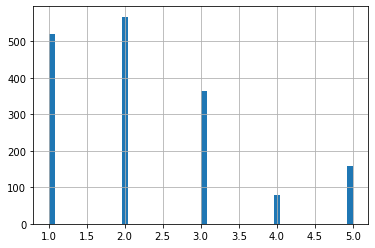

In [25]:
train_inputs['Technical'].hist(bins=50)

In [26]:
def new_col(df):
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()
    
    df1['Technicalskill'] = pd.cut(df1['Technical'],
                                       bins=[0,0.5,1,5,15,50,10000],  #bins=[exclusive, inclusive]
                                       labels=False, 
                                       include_lowest=True,
                                       ordered=True)
    
#     You can also do this if you want categorical values:    
#     df1['num_reviews_binned'] = pd.cut(df1['number_of_reviews'],
#                                        bins=[0,0.5,1,5,15,50,10000], 
#                                        labels=['None','Very few','Few','Medium','Many','Too many'], 
#                                        include_lowest=True,
#                                        ordered=False)

    
    return df1[['Technicalskill']]
    # You can use this to check whether the calculation is made correctly:
    #return df1

In [27]:
#Let's test the new function:

# Send train set to the function we created
new_col(train_set)

,Technicalskill
429,2
1185,2
2116,2
2127,2
458,1
...,...
1638,2
1095,2
1130,2
1294,2


##  Identify the numerical and categorical columns

In [28]:
train_inputs.dtypes

Job Description    object
Location           object
Min_years_exp       int64
Technical           int64
Comm                int64
Travel             object
dtype: object

In [29]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [30]:
numeric_columns

['Min_years_exp', 'Technical', 'Comm']

In [31]:
categorical_columns

['Job Description', 'Location', 'Travel']

In [32]:
transformed_columns = ['Technical']

# Pipeline

In [33]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [34]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [35]:
number_svd_components = 400
text_transformer = Pipeline(steps=[
                ('my_new_column', FunctionTransformer(new_col)),
                ('text', TfidfVectorizer(stop_words='english')),
                ('svd', TruncatedSVD(n_components=number_svd_components, n_iter=10))
            ])

In [36]:
my_new_column = Pipeline(steps=[('my_new_column', FunctionTransformer(new_col)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())])

In [37]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('trans', my_new_column, transformed_columns)],
        remainder='drop')

# Transform: fit_transform() for TRAIN

In [38]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

<1689x1213 sparse matrix of type '<class 'numpy.float64'>'
	with 11823 stored elements in Compressed Sparse Row format>

In [39]:
train_x.toarray()

array([[-1.12955755,  0.59306224,  0.9780514 , ...,  0.        ,
         1.        ,  0.66787846],
       [ 1.0979062 ,  0.59306224, -1.25579419, ...,  0.        ,
         0.        ,  0.66787846],
       [-1.12955755,  0.59306224,  2.09497419, ...,  0.        ,
         1.        ,  0.66787846],
       ...,
       [-1.12955755,  0.59306224, -1.25579419, ...,  1.        ,
         0.        ,  0.66787846],
       [ 0.54104026, -0.23136749, -0.1388714 , ...,  0.        ,
         1.        ,  0.66787846],
       [-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         1.        ,  0.66787846]])

In [40]:
train_x.shape

(1689, 1213)

# Tranform: transform() for TEST

In [41]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

<724x1213 sparse matrix of type '<class 'numpy.float64'>'
	with 4738 stored elements in Compressed Sparse Row format>

In [42]:
test_x.toarray()

array([[-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         1.        ,  0.66787846],
       [ 0.54104026,  0.59306224, -2.37271699, ...,  1.        ,
         0.        ,  0.66787846],
       [ 0.54104026,  0.59306224, -1.25579419, ...,  0.        ,
         1.        ,  0.66787846],
       ...,
       [-1.12955755, -0.23136749,  0.9780514 , ...,  0.        ,
         1.        ,  0.66787846],
       [ 0.54104026,  2.24192171, -1.25579419, ...,  0.        ,
         0.        ,  0.66787846],
       [ 1.0979062 , -1.05579722,  0.9780514 , ...,  0.        ,
         1.        , -1.4972784 ]])

In [43]:
test_x.shape

(724, 1213)

## Find the Baseline (1 point)

In [44]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(train_x, train_y)

DummyRegressor()

In [45]:
from sklearn.metrics import mean_squared_error

## Acuracy Values

In [46]:
#Baseline Train RMSE
dummy_train_pred = dummy_regr.predict(train_x)

baseline_train_mse = mean_squared_error(train_y, dummy_train_pred)

baseline_train_rmse = np.sqrt(baseline_train_mse)

print('Baseline Train RMSE: {}' .format(baseline_train_rmse))

Baseline Train RMSE: 29582.833221810994


In [47]:
#Baseline Test RMSE
dummy_test_pred = dummy_regr.predict(test_x)

baseline_test_mse = mean_squared_error (test_y, dummy_test_pred)

baseline_test_rmse = np.sqrt(baseline_test_mse)

print('Baseline Test RMSE: {}' .format(baseline_test_rmse))

Baseline Test RMSE: 28294.892856870818


# Section 2: (5 points in total)

Build the following models:


## Decision Tree: (1 point)

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf = 10) 

tree_reg.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [49]:
#Train RMSE
train_pred = tree_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 29181.176569565057


In [50]:
#Test RMSE
test_pred = tree_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 28599.71696809674


In [51]:
train_error = []
test_error = []

for x in range(1,11):
    tree_reg3 = DecisionTreeRegressor(max_depth=x)
    tree_reg3.fit(train_x, train_y)
    reg_train_predictions = tree_reg3.predict(train_x)
    reg_test_predictions = tree_reg3.predict(test_x)
    train_rmse = round(np.sqrt(mean_squared_error (train_y, reg_train_predictions)),4)
    test_rmse = round(np.sqrt(mean_squared_error (test_y, reg_test_predictions)),4)
    print('# Max depth = {}'.format(x) + "     " +'Train RMSE = {}'.format(train_rmse) + "   "
         'Test RMSE = {}'.format(test_rmse))
    
    train_error.append(train_rmse)
    test_error.append(test_rmse)


# Max depth = 1     Train RMSE = 29203.1467   Test RMSE = 28284.3275
# Max depth = 2     Train RMSE = 28880.2708   Test RMSE = 28275.4515
# Max depth = 3     Train RMSE = 28578.1936   Test RMSE = 28267.6451
# Max depth = 4     Train RMSE = 28305.0797   Test RMSE = 28260.9236
# Max depth = 5     Train RMSE = 28079.9618   Test RMSE = 27727.7252
# Max depth = 6     Train RMSE = 27854.1164   Test RMSE = 27721.5988
# Max depth = 7     Train RMSE = 27638.5576   Test RMSE = 27716.1534
# Max depth = 8     Train RMSE = 27422.6082   Test RMSE = 27712.6219
# Max depth = 9     Train RMSE = 27225.9236   Test RMSE = 27709.5011
# Max depth = 10     Train RMSE = 27035.3843   Test RMSE = 27267.6641


In [52]:
from matplotlib import pyplot as plt

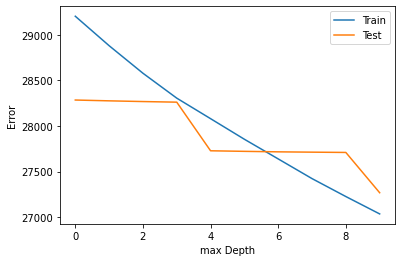

In [53]:
plt.plot(train_error, label='Train')
plt.plot(test_error, label='Test')
plt.xlabel("max Depth")
plt.ylabel("Error")
plt.legend()

## Voting regressor (1 points):

The voting regressor should have at least 3 individual models

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dtree_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), 
                        ('svr', svm_reg), 
                        ('sgd', sgd_reg)])

voting_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor(max_iter=10000))])

In [55]:
#Train RMSE
train_pred = voting_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 19167.15999352064


In [56]:
#Test RMSE
test_pred = voting_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 23419.458279162285


In [57]:
dtree_reg = DecisionTreeRegressor(max_depth=20)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.01, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.4, 0.4, 0.2])

voting_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=20)),
                            ('svr', SVR(C=10, epsilon=0.01)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.4, 0.4, 0.2])

In [58]:
#Train RMSE
train_pred = voting_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 22119.202724423536


In [59]:
#Test RMSE
test_pred = voting_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 24760.32586419216


## A Boosting model: (1 point)

Build either an Adaboost or a GradientBoost model

## Adaboost Model 

In [60]:
from sklearn.ensemble import AdaBoostRegressor 


ada_reg = AdaBoostRegressor( 
            DecisionTreeRegressor(max_depth=10), n_estimators=500, 
            learning_rate=0.1) 

ada_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=500)

In [61]:
#Train RMSE
train_pred = ada_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 29647.778202916063


In [62]:
#Test RMSE
test_pred = ada_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 30331.892618689868


In [64]:
ada_reg = AdaBoostRegressor( 
            DecisionTreeRegressor(max_depth=50), n_estimators=200, 
            learning_rate=0.1) 

ada_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=50),
                  learning_rate=0.1, n_estimators=200)

In [65]:
#Train RMSE
train_pred = ada_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 21756.294213326528


In [66]:
#Test RMSE
test_pred = ada_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 24428.1207329502


## Neural network: (1 point)

In [67]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

mlp_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [68]:
#Train RMSE
train_pred = mlp_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 61618.87517523439


In [69]:
#Test RMSE
test_pred = mlp_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 60589.11433440012


In [70]:

mlp_reg = MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000)

mlp_reg.fit(train_x, train_y)

/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sanjanathinderu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000)

In [71]:
#Train RMSE
train_pred = mlp_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 22917.014986427355


In [73]:
#Test RMSE
test_pred = mlp_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 25201.24775531519


## Grid search (1 points)

Perform either a full or randomized grid search on any model you want. There has to be at least two parameters for the search. 

## Randomized Grid Search

In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'min_samples_leaf': np.arange(1, 20), 
     'max_depth': np.arange(1,20)}
  ]

tree_reg = DecisionTreeRegressor()

grid_search = RandomizedSearchCV(tree_reg, param_grid, cv=5, n_iter=10,
                           scoring='neg_mean_squared_error', verbose=1,
                           return_train_score=True)

grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [75]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

29603.386504628426 {'min_samples_leaf': 2, 'max_depth': 17}
30177.029175556403 {'min_samples_leaf': 8, 'max_depth': 7}
30095.85056123195 {'min_samples_leaf': 14, 'max_depth': 6}
30239.460277124766 {'min_samples_leaf': 12, 'max_depth': 7}
32183.96822406894 {'min_samples_leaf': 3, 'max_depth': 19}
30194.521443365637 {'min_samples_leaf': 11, 'max_depth': 5}
29808.34379257369 {'min_samples_leaf': 14, 'max_depth': 3}
29671.231869773113 {'min_samples_leaf': 10, 'max_depth': 2}
29602.004644167973 {'min_samples_leaf': 5, 'max_depth': 3}
29494.435734104834 {'min_samples_leaf': 5, 'max_depth': 1}


In [76]:
grid_search.best_params_

{'min_samples_leaf': 5, 'max_depth': 1}

In [77]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5)

In [78]:
#Train RMSE
train_pred = grid_search.best_estimator_.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 29468.612804209773


In [79]:
#Test RMSE
test_pred = grid_search.best_estimator_.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 28254.600330453908


# Discussion (4 points in total)


## List the train and test values of each model you built (1 points)

## Which model performs the best and why? (0.5 points) 
## How does it compare to baseline? (0.5 points)

Hint: The best model is the one that has the lowest TEST RMSE value (regardless of any of the training values). If you select your model based on TRAIN values, you will lose points.

## Is there any evidence of overfitting in the best model, why or why not? If there is, what did you do about it? (1 point)

## Is there any overfitting in the other models (besides the best model), why or why not? If there is, what did you do about it? (1 point)